# Risk profiling for customer churn

In [ ]:
#https://www.kaggle.com/osmi/mental-health-in-tech-survey

Some of my own findings + exploration page!!

To note:
- remove self-emplyed
- measure male vs. female vs other
- have you sought treatments? 


- How does remote work affect your mental health?
- How do big vs. small companies compare
- if you are self-employed or not
- seek help - most companies don't provide help or employees don't know if they those options

To explore:
- what is a stronger predictor: location, support by employer, remote work, size of the company, family history, etc. 
Sankey: 
- does it make a difference if an employer just has benefits, or is active in supporting the mental health? 
- out of those where mental health is supported/not at work->  does it interfere with your work -> how many have seeked treatment? 

In [1]:
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
from pandas_profiling import ProfileReport
import numpy as np

In [3]:
# Use the Kaggle API to download the dataset
download = True

if download: 
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files('osmihelp/osmi-mental-health-in-tech-survey-2019', path='kaggle_datasets', unzip=True)

In [24]:
survey_df = pd.read_csv('kaggle_datasets/OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv')
#survey_df = pd.read_csv('kaggle_datasets/survey.csv')

In [25]:
len(survey_df.columns)

82

In [26]:
survey_df.shape

(352, 82)

In [27]:
# survey_df = survey_df[survey_df['self_employed']=='No'] 
#survey_df['self_employed'].value_counts()
# survey_df['Gender'].str.lower().value_counts()

In [6]:
# import sqlite3

# # Read sqlite query results into a pandas DataFrame
# con = sqlite3.connect("kaggle_datasets/mental_health.sqlite")
# survey_df = pd.read_sql_query("SELECT * FROM Survey", con)
# answer_df = pd.read_sql_query("SELECT * FROM Answer", con)
# question_df = pd.read_sql_query("SELECT * FROM Question", con)

# # Verify that result of SQL query is stored in the dataframe
# print(survey_df.head())

# con.close()

In [7]:
# !!! 
# survey_df.columns.tolist()

In [8]:
columns = [
 '*Are you self-employed?*',
 'What is your age?',
 'What is your gender?',
 'What country do you *live* in?',
 'What US state or territory do you *live* in?',
 'What is your race?',
 'What country do you *work* in?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
           
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 
 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'Have you ever discussed your mental health with your employer?',
 'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.',
 'Have you ever discussed your mental health with coworkers?',
 'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
 'Overall, how much importance does your employer place on physical health?',
 'Overall, how much importance does your employer place on mental health?',

 'Do you *currently* have a mental health disorder?',
 'Have you ever been *diagnosed* with a mental health disorder?',
    
 '*What disorder(s) have you been diagnosed with?*',
 '*If possibly, what disorder(s) do you believe you have?*',
 '*If so, what disorder(s) were you diagnosed with?*',
 'Have you had a mental health disorder in the past?',
 'Have you ever sought treatment for a mental health disorder from a mental health professional?',
 'Do you have a family history of mental illness?',         
 'Are you openly identified at work as a person with a mental health issue?',
 'Has being identified as a person with a mental health issue affected your career?',
 'How has it affected your career?',          
 'Do you believe your productivity is ever affected by a mental health issue?',
 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',           
 'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
  'How willing would you be to share with friends and family that you have a mental illness?',

    
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
 'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
 'Would you bring up your *mental* health with a potential employer in an interview?',
 'Why or why not?.1',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?',
 'Describe the circumstances of the supportive or well handled response.',
 'Overall, how well do you think the tech industry supports employees with mental health issues?',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.',
]          

In [28]:
short_survey_df = survey_df[columns]

In [29]:
short_survey_df.shape

(352, 44)

In [30]:
short_survey_df['What is your gender?'].value_counts()

Male                                   143
male                                    52
Female                                  49
female                                  27
M                                       15
F                                        9
m                                        8
Woman                                    4
f                                        3
None                                     2
Female                                   2
Non-binary                               2
agender                                  2
Let's keep it simple and say "male"      1
Trans non-binary/genderfluid             1
femmina                                  1
woman                                    1
Questioning                              1
Non-binary and gender fluid              1
Identify as male                         1
rr                                       1
Make                                     1
Man                                      1
CIS Male   

In [31]:
basic_list = ['male', 'female']
column_main = 'What is your gender?'

def clean_data(df):
    df[column_main] = df[column_main].str.lower()
    df[column_main] = df[column_main].replace(['m', 'cis male', 'male ', 'man', 'cis man',
                                         'male (cis)', 'msle', 'make', 'mail', 'malr', 'maile'], 'male')
    df[column_main] = df[column_main].replace(['female', 'woman', 'female ', 
                                         'f', 'female (cis)', 'femake', 'femail', 'femile', 'femmina',
                                              'cis woman', ], 'female')
    
    df.loc[~df[column_main].isin(basic_list)]='other'
    return df

short_survey_df = clean_data(short_survey_df)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [32]:
short_survey_df[short_survey_df['What is your age?']=='other'].shape

(28, 44)

In [38]:
gender_df = short_survey_df['What is your gender?'].value_counts().reset_index().rename(columns={'What is your gender?':'nr_replies',
                                                                               'index':'gender'})

In [39]:
gender_df

,gender,nr_replies
0,male,225
1,female,99
2,other,28


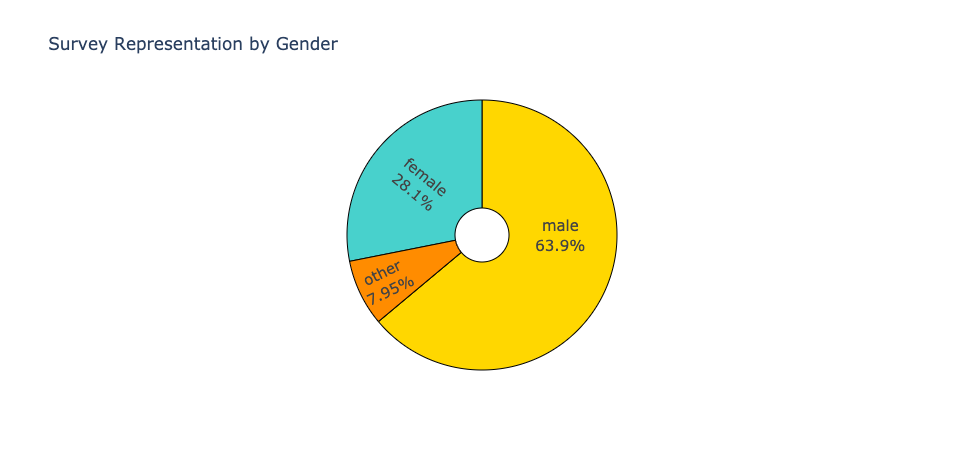

In [55]:
import plotly.graph_objects as go

labels = gender_df['gender']
values = gender_df['nr_replies']

#colors=['lightcyan','cyan', 'darkblue']
colors = ['gold', 'mediumturquoise', 'darkorange'] #, 'lightgreen']


# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values, hole=.2,
                             textinfo='label+percent',
                             insidetextorientation='radial' 
  )])

fig.update_traces(textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)),
                   )

fig.update(layout_title_text='Survey Representation by Gender',
           layout_showlegend=False)
fig.show()

## Get age groups

In [14]:
# Getting rid of 28 rows
short_survey_df = short_survey_df[short_survey_df['What is your age?']!='other']
short_survey_df['What is your age?'] = short_survey_df['What is your age?'].astype(np.int)
short_survey_df['What is your age?'].value_counts()

def func(row):
        if (row['What is your age?'] >= 20) & (row['What is your age?'] < 25):
            return '20-25'
        elif (row['What is your age?'] >= 25) & (row['What is your age?'] < 30):
            return '25-30'
        elif (row['What is your age?'] >= 30) & (row['What is your age?'] < 35):
            return '30-35'   
        elif (row['What is your age?'] >= 35) & (row['What is your age?'] < 40):
            return '35-40'          
        elif (row['What is your age?'] >= 40) & (row['What is your age?'] < 45):
            return '40-45'         
        elif (row['What is your age?'] >= 45) & (row['What is your age?'] < 50):
            return '45-50'         
        elif (row['What is your age?'] >= 50) & (row['What is your age?'] < 55):
            return '50-55'   
        elif (row['What is your age?'] >= 55) & (row['What is your age?'] < 60):
            return '55-60'   
        elif (row['What is your age?'] >= 60) & (row['What is your age?'] < 65):
            return '60-65'
        else:
            return 'other'
        
short_survey_df['age_group'] = short_survey_df.apply(func, axis=1)

Get age groups in percentage

In [15]:
age_groups_df = short_survey_df['age_group'].value_counts(normalize=True).reset_index().sort_values(['index'])
age_groups_df = age_groups_df.rename(columns={'age_group':'perc',
                              'index':'age_group'}) 

In [16]:
age_groups_df.head()

,age_group,perc
5,20-25,0.067901
2,25-30,0.197531
0,30-35,0.219136
1,35-40,0.203704
3,40-45,0.126543


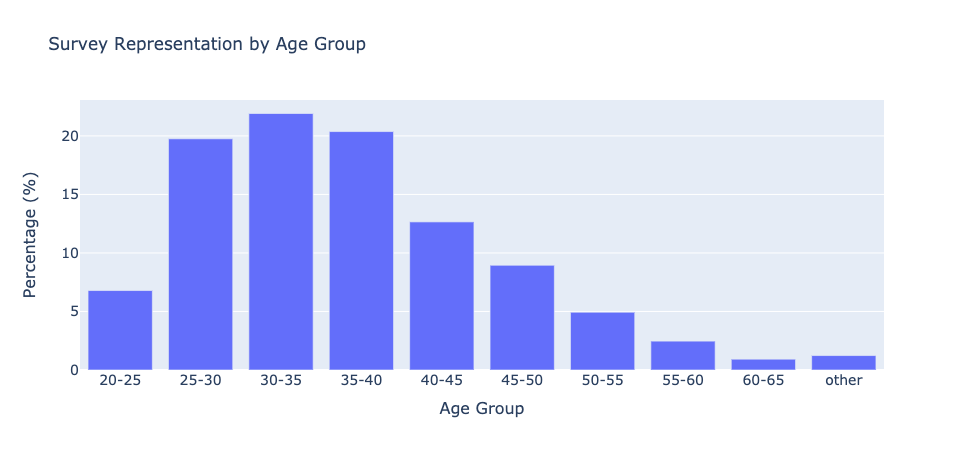

In [56]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(x=age_groups_df['age_group'], 
           y=age_groups_df['perc']*100),
])
# Change the bar mode
fig.update_layout(barmode='group',
                  xaxis=dict(
                        title='Age Group',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  yaxis=dict(
                        title='Percentage (%)',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),                 
                 )

fig.update(layout_title_text='Survey Representation by Age Group',
           layout_showlegend=False)

fig.show()

## Gender

In [20]:
# Let's have a look at the stats of the columns
#. df.describe()

## Prep data for modelling 

## Select X and y

The dataset is ready for modelling. We need to select independent and the dependent variable, applu feature scaling, and split the dataset into training and test set.

In [9]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

# Apply feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Fit logistic regression model

In [10]:
# Train a logistic regression model on the raining set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Next, we apply k-fold cross validation to calculate the accuracy of the model.

In [11]:
# Apply k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X, y = y, cv = 10)
print('Accuracy:', accuracies.mean())
print('Standard deviation: ', accuracies.std())

Accuracy: 0.8408
Standard deviation:  0.007277362159464108


## Get the probabilities for plotting purposes

In [12]:
y_pred_proba = model.predict_proba(X)

Create probability dataframe and rename columns

In [13]:
proba_df = pd.DataFrame(y_pred_proba)
proba_df['y_test'] = y

In [14]:
proba_df = proba_df.rename(columns={0:'retention_proba', 1:'churn_proba'})

In [15]:
def risk_calc(row):
    if row['churn_proba']<0.2: 
        return "Low risk (<20%)"
    elif 0.2<=row['churn_proba']<=0.8: 
        return 'Medium risk (20%-80%)'
    else:
        return 'High risk (>80%)'

proba_df['risk_rating'] = proba_df.apply(risk_calc, axis=1)

In [16]:
proba_df.sample(10)

,retention_proba,churn_proba,y_test,risk_rating
2330,0.964257,0.035743,0,Low risk (<20%)
6507,0.832879,0.167121,0,Low risk (<20%)
6818,0.873202,0.126798,0,Low risk (<20%)
4710,0.800054,0.199946,0,Low risk (<20%)
5843,0.992718,0.007282,0,Low risk (<20%)
7417,0.543452,0.456548,0,Medium risk (20%-80%)
2167,0.982027,0.017973,0,Low risk (<20%)
8552,0.951933,0.048067,0,Low risk (<20%)
5309,0.764095,0.235905,0,Medium risk (20%-80%)
2417,0.929068,0.070932,0,Low risk (<20%)


In [17]:
# Get the number of cases per risk category
grouped_proba_df = proba_df['risk_rating'].value_counts().reset_index()

In [18]:
proba_df['risk_rating'].value_counts().reset_index()['risk_rating']

0    6478
1    3231
2     291
Name: risk_rating, dtype: int64

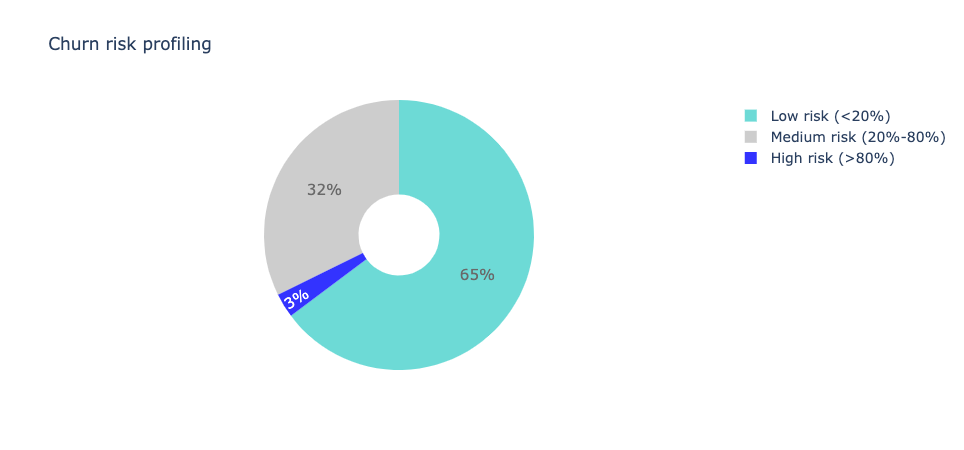

In [22]:
import plotly.graph_objects as go

colors = [ 'mediumturquoise', 'silver', 'blue'] 

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=proba_df['risk_rating'].value_counts().reset_index()['index'], 
                             values=proba_df['risk_rating'].value_counts().reset_index()['risk_rating'], 
                             textfont_size=15,
                             opacity=0.8,
                             marker_colors=colors, 
                             texttemplate="%{percent:.0%f}",
                             hole=.3)])


fig.update_layout(title_text='Churn risk profiling', 
                  template='plotly_white',
                  legend=dict(
                        font=dict(
                            size=14,
                        ),)
                  
                 )
fig.show()